In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Kaggle Dataset : https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression?resource=download
data = pd.read_csv("Data/Salary_dataset.csv")

In [3]:
data.shape

(30, 3)

## Step 1 : Know your data

In [4]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
data.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [6]:
#drop the unnamed column as we do not need it
data = data.drop('Unnamed: 0', axis=1)

In [7]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Text(0, 0.5, 'Salary')

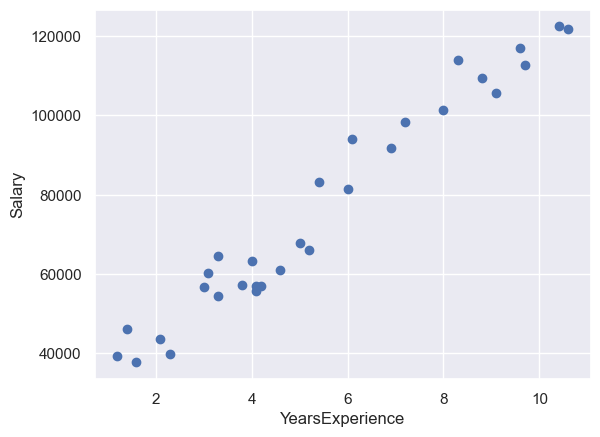

In [8]:
# Check the relationship between Experience and Salary
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [9]:
# Correlation between the Experience and Salary
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Step 2 : Divide the data into dependent and independent features

In [10]:
X = data[['YearsExperience']] # independent features should be dataframe or a 2 dimensional array
y = data["Salary"] # Can be a series/1D form since it is always 1 dimensional

## Step 3 : Train and Test split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 1)
(8, 1)
(22,)
(8,)


## Step 4 : Standardization / Normalization (Advised)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Use fit_transform only on training
X_test = scaler.transform(X_test) # Use the same scaler used for training data on testing (using only transform) 

## Step 5 : Apply Simple Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [15]:
# Printing the coefficient and intercept of Experience
print("Coefficient : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient :  [25240.85687009]
Intercept :  72074.63636363637


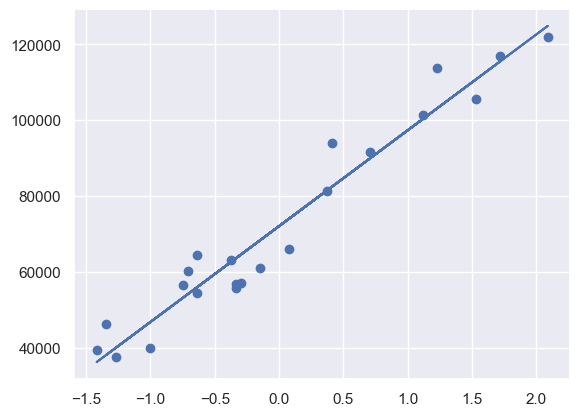

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [17]:
# Prediciton for test data
y_pred = regression.predict(X_test)

## Step 6 : Calculate the performance metrics

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
print(mae)
print(mse)
print(rmse)
print(score)

3436.937009209336
16318501.525526928
4039.6165072351764
0.9770849752779536


## Implementing OLS Regression

In [19]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)

In [20]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.109
Model:                            OLS   Adj. R-squared (uncentered):              0.066
Method:                 Least Squares   F-statistic:                              2.557
Date:                Wed, 21 May 2025   Prob (F-statistic):                       0.125
Time:                        18:44:10   Log-Likelihood:                         -277.37
No. Observations:                  22   AIC:                                      556.7
Df Residuals:                      21   BIC:                                      557.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Step 7 : Prediction for new data

In [21]:
regression.predict(scaler.transform([[5]]))

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([72074.63636364])